In [ ]:
import pandas as pd

edges_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.edges'
graph_idx_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_idx'
graph_labels_path = '/Users/alessandro/Downloads/COLLAB/COLLAB.graph_labels'

# Load files
edges_df = pd.read_csv(edges_path, header=None, names=['source', 'target'])
graph_idx_df = pd.read_csv(graph_idx_path, header=None, names=['graph_id'])
graph_labels_df = pd.read_csv(graph_labels_path, header=None, names=['label'])


In [3]:
# Inspect the data
print(edges_df.head())
print(graph_idx_df.head())
print(graph_labels_df.head())

   source  target
0       1       2
1       2       1
2       1       3
3       3       1
4       1       4
   graph_id
0         1
1         1
2         1
3         1
4         1
   label
0      1
1      1
2      1
3      1
4      1


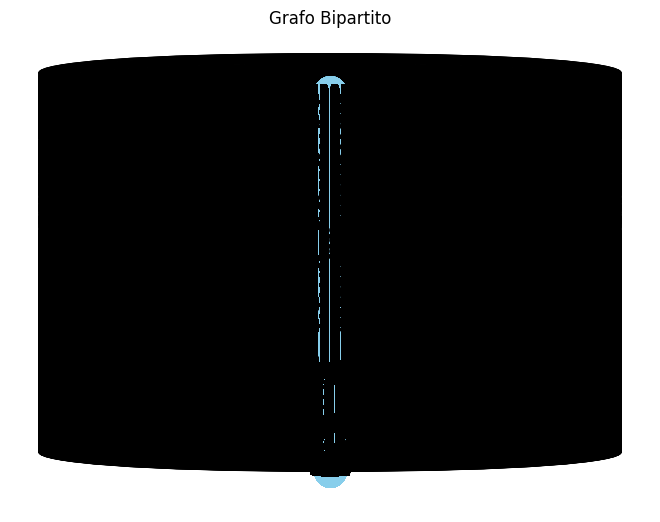

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
edges = list(edges_df.itertuples(index=False, name=None))
B = nx.Graph()
U = set(u for u, v in edges)  # Insieme dei nodi U
V = set(v for u, v in edges)  # Insieme dei nodi V

# Aggiungi nodi con attributo bipartito
B.add_nodes_from(U, bipartite=0)  # Insieme U
B.add_nodes_from(V, bipartite=1)  # Insieme V

# Aggiungi gli archi
B.add_edges_from(edges)

# Visualizzazione del grafo bipartito
pos = nx.bipartite_layout(B, U)  # Posizionamento dei nodi
nx.draw(B, pos, with_labels=True, node_size=500, node_color="skyblue")
plt.title("Grafo Bipartito")
plt.show()


In [5]:
print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")

Number of nodes: 372474
Number of edges: 12288916


In [6]:
# Check for duplicates and missing values
print('null nodes', edges_df.isnull().sum())  # Check for missing values
print('duplicated nodes', edges_df.duplicated().sum())  # Check for duplicates

null nodes source    0
target    0
dtype: int64
duplicated nodes 24574995


In [7]:
# Drop duplicates if necessary
edges_df.drop_duplicates(inplace=True)
#checking if all duplicated nodes are deleted
print('duplicated nodes', edges_df.duplicated().sum())

duplicated nodes 0


In [8]:
avg_clustering = nx.average_clustering(B)

In [9]:
print(avg_clustering)

0.8911636361874256


In [12]:
print(graph_labels_df.nunique())
graph_labels_df.describe()

label    3
dtype: int64


,label
count,5000.000000
mean,1.805000
std,0.898408
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,3.000000


In [15]:
print(graph_idx_df.nunique())
graph_idx_df.describe()
print(graph_idx_df.tail())

graph_id    5000
dtype: int64
        graph_id
372469      5000
372470      5000
372471      5000
372472      5000
372473      5000
